In [12]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root:", project_root)


Project root: g:\EPITA Course Materials\AI Project  Methology\churn_prediction_project


In [13]:
import pandas as pd
import shap

from src.data_preprocessing import load_and_clean_data
from src.feature_engineering import build_customer_features


In [14]:
DATA_PATH = "../data/Online Retail.xlsx"

df_clean = load_and_clean_data(DATA_PATH)
customer_df = build_customer_features(df_clean)

# Define churn
customer_df["churn"] = (customer_df["recency_days"] > 90).astype(int)

# RAW features ONLY (NO scaling)
X = customer_df[["num_orders", "total_quantity", "total_spent"]]
y = customer_df["churn"]

print(X.shape, y.shape)


(4338, 3) (4338,)


In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X, y)

print("RF trained on raw features")


RF trained on raw features


In [17]:
explainer = shap.Explainer(rf, X)
shap_values = explainer(X)

print("SHAP values computed")


100%|===================| 8654/8676 [05:43<00:00]        

SHAP values computed


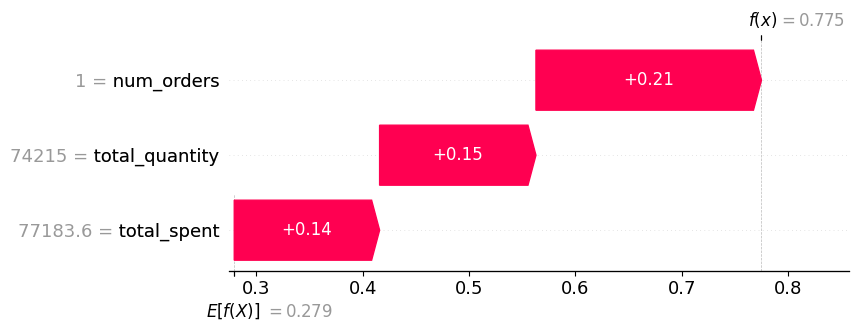

In [19]:
# Pick one customer (e.g., first row)
i = 0

# Local SHAP explanation for one customer
i = 0

shap.plots.waterfall(shap_values[i, :, 1])
